In [3]:
# Write your imports hereimport os
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


from Utils.Functions.func_fix_column_names import snake_case
from Utils.Functions.func_convert_units_kg import units_to_kg
from Utils.Functions.func_spanish_to_english import translator
from Utils.Functions.func_parse_trimesters import parse_trimester
from Utils.Dicts.dict_graph_rating_colums import rating_columns
from Utils.Lists.stats_Raiting_Columns import statistical_columns
from Utils.Functions.func_helper_query_dataset import query_dataframe
from Utils.Functions.func_helper_normalize_text import normalize_text
from Utils.Dicts.dict_Country_on_Continent import country_to_continent
from Utils.Functions.func_helper_normalize_dates import normalize_dates
from Utils.Functions.func_helper_normalize_month import normalize_month

from Utils.Functions.func_fix_date_multiColumns import convert_date_multiColumns

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [20]:
indent = " " * 0
base_path = os.getcwd()

# f = open('output_log.txt', 'w', encoding='utf-8')
# sys.stdout = f

# Loading dataset config CSV
config_path = os.path.join(base_path, "Utils", "Configs", "datasets_config.csv")
datasets_df = pd.read_csv(config_path)

# Convert CSV config into dictionary with full paths
dataset_paths = {
    row['name']: os.path.normpath(os.path.join(base_path, row['path']))
    for _, row in datasets_df.iterrows()
}

coffee_dataset_path = dataset_paths.get('coffee_data')
coffee_dataset = pd.read_csv(cofee_dataset_path, encoding='ISO-8859-1')

In [21]:
query_dataframe(coffee_dataset, filepath=coffee_dataset_path , encoding='ISO-8859-1')

       Encoding check:
                                                
        Filepath: C:\Users\georgi.petrov\DataScience\04\lab\merged_data_cleaned.csv
        Encoding: ISO-8859-1
        Total lines in file (including header): 1347
        Rows loaded in DataFrame: 1339
                                                
                                                

   Dataset Summary:
   DataFrame dimensions: (1339, 44)
                                                
                                                
                                                

   Missing values per column:
                                                
Owner                      7
Country.of.Origin          1
Farm.Name                359
Lot.Number              1063
Mill                     318
ICO.Number               159
Company                  209
Altitude                 226
Region                    59
Producer                 232
Harvest.Year              47
Owner.1               

### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [26]:
numerical = list(coffee_dataset.select_dtypes(include=[np.number]).columns)
categorical = list(coffee_dataset.select_dtypes(include='object').columns)

if 'Unnamed: 0' in numerical:
    numerical.remove('Unnamed: 0')

In [27]:
print(f"{'':48}\n" * 1)
print(indent + f"\nNumber of Numerical features: {len(numerical)}")
print(indent + "\nNumerical features:")
for i in range(0, len(numerical), 5):
    print(numerical[i:i+5])

                                                


Number of Numerical features: 19

Numerical features:
['Number.of.Bags', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity']
['Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness']
['Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers']
['Category.Two.Defects', 'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']


In [28]:
print(indent + f"\nNumber of Categorical features: {len(categorical)}")
print(indent + "\nCategorical features:")
for i in range(0, len(categorical), 5):
    print(categorical[i:i+5])


Number of Categorical features: 24

Categorical features:
['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number']
['Mill', 'ICO.Number', 'Company', 'Altitude', 'Region']
['Producer', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year', 'Grading.Date']
['Owner.1', 'Variety', 'Processing.Method', 'Color', 'Expiration']
['Certification.Body', 'Certification.Address', 'Certification.Contact', 'unit_of_measurement']


### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

### In order to rename columns we will use custom created function 'snake_case' imported in the top of the file with 
### from Utils.Functions.func_fix_column_names import snake_case

In [30]:
coffee_dataset_columns_renamed = coffee_dataset.columns.map(snake_case)
coffee_dataset_columns_original_names = coffee_dataset.columns.copy()
coffee_dataset.columns = coffee_dataset_columns_renamed

In [32]:
print(coffee_dataset_columns_original_names)
print(f"{'':48}\n" * 1)
print("DataFrame. Columns after being renamed:\n")
print(coffee_dataset.columns)
coffee_dataset.set_index('unnamed: 0', inplace=True)
print(f"{'':48}\n" * 1)

print(indent + f"Index column for our DataFrame is: {coffee_dataset.index.name}")
print("DataFrame. Columns after declaring Index column:\n")
print(coffee_dataset.columns)

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')
                                                

DataFrame. Columns after being renamed:

Index(['unnamed: 0', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

##  lets observe specified column ->  bag_weights 

In [35]:
print(coffee_dataset["bag_weight"])

unnamed: 0
0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: bag_weight, Length: 1339, dtype: object


In [36]:
print(coffee_dataset["bag_weight"].unique())

['60 kg' '1' '30 kg' '69 kg' '1 kg' '2 kg,lbs' '6' '3 lbs' '50 kg' '2 lbs'
 '100 lbs' '15 kg' '2 kg' '2' '70 kg' '19200 kg' '5 lbs' '1 kg,lbs' '6 kg'
 '0 lbs' '46 kg' '40 kg' '20 kg' '34 kg' '1 lbs' '660 kg' '18975 kg'
 '12000 kg' '35 kg' '66 kg' '80 kg' '132 lbs' '5 kg' '25 kg' '59 kg'
 '18000 kg' '150 lbs' '9000 kg' '18 kg' '10 kg' '29 kg' '1218 kg' '4 lbs'
 '0 kg' '13800 kg' '1500 kg' '24 kg' '80 lbs' '8 kg' '3 kg' '350 kg'
 '67 kg' '4 kg' '55 lbs' '100 kg' '130 lbs']


 ##   [Bag.Weight] column contains as many different measurment units as you can possibly think of.
     Column should be normalized with a single unit, most likely kilogram as ubiversal SI unit for measuring weight.

##  First we are going to check if [Bag.Weight] column contains NaN as a values.

In [38]:
print(coffee_dataset["bag_weight"].isna())

unnamed: 0
0       False
1       False
2       False
3       False
4       False
        ...  
1334    False
1335    False
1336    False
1337    False
1338    False
Name: bag_weight, Length: 1339, dtype: bool


In [39]:
print(coffee_dataset["bag_weight"].isna().any())

False


In [40]:
coffee_dataset["is_missing"] = coffee_dataset["bag_weight"].isna()
print(coffee_dataset[["bag_weight", 'is_missing']])
print(coffee_dataset["bag_weight"].isna().sum())

           bag_weight  is_missing
unnamed: 0                       
0               60 kg       False
1               60 kg       False
2                   1       False
3               60 kg       False
4               60 kg       False
...               ...         ...
1334             2 kg       False
1335             2 kg       False
1336             1 kg       False
1337            5 lbs       False
1338            5 lbs       False

[1339 rows x 2 columns]
0


##  For our relief and best surprise [bag_weight] column does not have any NaN as a values.
##  We can now convert all these different measurement units into a sigle one. THE ONE!!!

##  We are going to call a custom made function "units_to_kg" which is going to 
##  convert all different units to a kilogram. Thus it we will be more convinient for us 
##  if we need to use [bag_weight] for further calculation  

In [41]:
coffee_dataset["bag_weight [kg]"] = coffee_dataset["bag_weight"].apply(units_to_kg)
print(coffee_dataset[["bag_weight", "bag_weight [kg]"]].head(10))

           bag_weight  bag_weight [kg]
unnamed: 0                            
0               60 kg               60
1               60 kg               60
2                   1                1
3               60 kg               60
4               60 kg               60
5               30 kg               30
6               69 kg               69
7               60 kg               60
8               60 kg               60
9               60 kg               60


##  After applying "units_to_kg" to [bag_weight] now all values are in same unit - kilogram.

In [42]:
print(coffee_dataset["bag_weight [kg]"].unique())

[   60     1    30    69     2     6    50    45    15    70 19200     0
    46    40    20    34   660 18975 12000    35    66    80     5    25
    59 18000    68  9000    18    10    29  1218 13800  1500    24    36
     8     3   350    67     4   100]


### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

##  Firts we will check the initial values in both [grading_date] and [expiration]
 ##    columns and based on whats in it, we are going to do some magic  

In [43]:
print(coffee_dataset[["grading_date", "expiration"]])

                   grading_date           expiration
unnamed: 0                                          
0               April 4th, 2015      April 3rd, 2016
1               April 4th, 2015      April 3rd, 2016
2                May 31st, 2010       May 31st, 2011
3              March 26th, 2015     March 25th, 2016
4               April 4th, 2015      April 3rd, 2016
...                         ...                  ...
1334         January 19th, 2016   January 18th, 2017
1335         January 19th, 2016   January 18th, 2017
1336        December 23rd, 2014  December 23rd, 2015
1337          August 25th, 2014    August 25th, 2015
1338          August 25th, 2014    August 25th, 2015

[1339 rows x 2 columns]


##  Both columns contains dates in format that only Chuck Noris can use for further calculation.   
##  But we are weak. We need something straightforward like "%Y-%m-%d"

##  We are going to use another custom function - convert_date_multiColumns wich will convert 
##  data in both [grading_date] and [expiration] columns to "%Y-%m-%d"

In [91]:
coffee_data_expiration_dates = convert_date_multiColumns(coffee_dataset, ["grading_date", "expiration"])
print(coffee_data_expiration_dates[["grading_date", "expiration"]])
print(coffee_data_expiration_dates[["grading_date", "expiration"]].isna().any())

           grading_date  expiration
unnamed: 0                         
0            2015-04-04  2016-04-03
1            2015-04-04  2016-04-03
2                   NaN         NaN
3            2015-03-26         NaN
4            2015-04-04  2016-04-03
...                 ...         ...
1334         2016-01-19         NaN
1335         2016-01-19         NaN
1336                NaN  2015-12-23
1337         2014-08-25         NaN
1338         2014-08-25         NaN

[1337 rows x 2 columns]
grading_date    True
expiration      True
dtype: bool


##  Both [grading_date] and [expiration] are now with "%Y-%m-%d" as a date format. Looks like there are no any NaNs
##  as a values in these columns. So we are good

##  Moving on with [harvest_year] column.

In [45]:
print(coffee_dataset["harvest_year"].unique())

['2014' nan '2013' '2012' 'March 2010' 'Sept 2009 - April 2010'
 'May-August' '2009/2010' '2015' '2011' '2016' '2015/2016' '2010'
 'Fall 2009' '2017' '2009 / 2010' '2010-2011' '2009-2010' '2009 - 2010'
 '2013/2014' '2017 / 2018' 'mmm' 'TEST' 'December 2009-March 2010'
 '2014/2015' '2011/2012' 'January 2011' '4T/10' '2016 / 2017'
 '23 July 2010' 'January Through April' '1T/2011' '4t/2010' '4T/2010'
 'August to December' 'Mayo a Julio' '47/2010' 'Abril - Julio' '4t/2011'
 'Abril - Julio /2011' 'Spring 2011 in Colombia.' '3T/2011' '2016/2017'
 '1t/2011' '2018' '4T72010' '08/09 crop']


##  This column contains quite a lot different types of date formats. It also have spanish words init. 
##  It appears that we have to deal not only with years, month to month as a period, but with some trimesters ->
##  like "4T/20100" as a harvest period.

##  We will start to clear all differences and inconsistencies one by one. For the beginning we can try 
##  to translate all spanish words to English. For this purpose  we have custom dictionaty "dict_Es_to_En" 
##  and a suctom function that will use this dictionary to translate what needs to be translated

##  We will try to convert this trimesters dates into "%Ъ-%мп-%д" формат
##  again we will use  custom magic functions. function 'translator' for translating spanish to english, 
## and function ->  normalize_dates to fix this date mess ..

In [47]:
coffee_dataset['harvest_year_original'] = coffee_dataset['harvest_year'].copy()

coffee_dataset['harvest_year_en'] = coffee_dataset['harvest_year'].apply(translator)
print(coffee_dataset['harvest_year_en'].unique())
print(f"{'':48}")
coffee_dataset['harvest_year'] = coffee_dataset['harvest_year_en']

coffee_dataset[["harvest_trimester_start", "harvest_trimester_end"]] = (
    coffee_dataset["harvest_year"]
    .apply(parse_trimester)
    .apply(pd.Series)
)

print(coffee_dataset[["harvest_year", "harvest_trimester_start", "harvest_trimester_end"]]
      .dropna()
      .head(10))

coffee_dataset['harvest_normalized'] = coffee_dataset['harvest_year'].apply(normalize_dates)

['2014' nan '2013' '2012' 'March 2010' 'Sept 2009 - April 2010'
 'May-August' '2009/2010' '2015' '2011' '2016' '2015/2016' '2010'
 'Fall 2009' '2017' '2009 / 2010' '2010-2011' '2009-2010' '2009 - 2010'
 '2013/2014' '2017 / 2018' 'mmm' 'TEST' 'December 2009-March 2010'
 '2014/2015' '2011/2012' 'January 2011' '4T/10' '2016 / 2017'
 '23 July 2010' 'January Through April' '1T/2011' '4t/2010' '4T/2010'
 'August to December' 'may to july' '47/2010' 'april - july' '4t/2011'
 'april - july /2011' 'Spring 2011 in Colombia.' '3T/2011' '2016/2017'
 '1t/2011' '2018' '4T72010' '08/09 crop']
                                                
           harvest_year harvest_trimester_start harvest_trimester_end
unnamed: 0                                                           
312               4T/10              2010-10-01            2010-12-31
437             1T/2011              2011-01-01            2011-03-31
438             4t/2010              2010-10-01            2010-12-31
439             

##  Това са нормализираните дати като имана-дата-месец
##  добавили сме две нови колони 'harvest_trimester_start'  и 'harvest_trimester_end' за 
## начяало и край на периода.. 

In [48]:
print(coffee_dataset['harvest_normalized'].dropna().unique())

['2014' '2013' '2012' 'march 2010' 'sept 2009 - april 2010' 'may - august'
 '2009 / 2010' '2015' '2011' '2016' '2015 / 2016' '2010' 'fall 2009'
 '2017' '2010 - 2011' '2009 - 2010' '2013 / 2014' '2017 / 2018' 'mmm'
 'test' 'december 2009 - march 2010' '2014 / 2015' '2011 / 2012'
 'january 2011' '4t / 10' '2016 / 2017' '23 july 2010'
 'january through april' '1t / 2011' '4t / 2010' 'august - december'
 'may - july' '47 / 2010' 'april - july' '4t / 2011' 'april - july / 2011'
 'spring 2011 in colombia.' '3t / 2011' '2018' '4t72010' '08 / 09 crop']


##  ще се опитаме да премахнем описателния характер в датите като "january through april",
##  новите дати трябва да са във формат "January - April"

##  Резултатът го запазваме в dataset-a Който ще продължим да обработваме по нататък

In [52]:
coffee_dataset["harvest_year_clean"] = (coffee_dataset["harvest_year"].apply(translator).apply(normalize_month))
coffee_dataset[["harvest_trimester_start", "harvest_trimester_end"]] = (coffee_dataset["harvest_year_clean"].apply(parse_trimester).apply(pd.Series))
print(coffee_dataset.columns)

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters',
       'is_missing', 'bag_weight [kg]', 'harvest_year_original',
       'harvest_year_en', 'harvest_trimester_start', 'harvest_trimester_end',
       'harvest_normalized', 'harvest_year_norm', 'harvest_year_clean'],
      dtype='object')


In [53]:
coffee_dataset = coffee_dataset.rename(columns={
    "harvest_trimester_start": "harvest_time_start",
    "harvest_trimester_end": "harvest_time_end"
})

print(coffee_dataset.columns)

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters',
       'is_missing', 'bag_weight [kg]', 'harvest_year_original',
       'harvest_year_en', 'harvest_time_start', 'harvest_time_end',
       'harvest_normalized', 'harvest_year_norm', 'harvest_year_clean'],
      dtype='object')


## Добавихме две нови колони които държат датата на стартиране на беритбата и датата на край на беритбата
##  на кафето, като са трансформирани тримесечните периоди  

In [54]:
print(coffee_dataset[["harvest_year", "harvest_time_start", "harvest_time_end"]].dropna().head(10))

           harvest_year harvest_time_start harvest_time_end
unnamed: 0                                                 
312               4T/10         2010-10-01       2010-12-31
437             1T/2011         2011-01-01       2011-03-31
438             4t/2010         2010-10-01       2010-12-31
439             4T/2010         2010-10-01       2010-12-31
530             4t/2011         2011-10-01       2011-12-31
631               4T/10         2010-10-01       2010-12-31
704             3T/2011         2011-07-01       2011-09-30
776               4T/10         2010-10-01       2010-12-31
832             4T/2010         2010-10-01       2010-12-31
857             1t/2011         2011-01-01       2011-03-31


### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

##  Ще се опитаме да нормализираме данните до малки букви и да премахем всякакви интервали в началото и края

In [55]:
countries = coffee_dataset['country_of_origin'].astype(str).str.strip().str.lower()
print(countries)

unnamed: 0
0            ethiopia
1            ethiopia
2           guatemala
3            ethiopia
4            ethiopia
            ...      
1334          ecuador
1335          ecuador
1336    united states
1337            india
1338          vietnam
Name: country_of_origin, Length: 1339, dtype: object


##  Слагаме си маркери като за какво считамне за 'unknown'

In [57]:
unknown_markers = ['', 'unknown', 'n/a', 'unk', 'none']
unknown_countries = countries.isin(unknown_markers) | coffee_dataset['country_of_origin'].isna()

totalUnknownCount = unknown_countries.sum()
print(f"Number of coffee with unknown countries of origin is: {totalUnknownCount}")

Number of coffee with unknown countries of origin is: 1


##  Според това което получихме има само едно кафе с 'unknown' country_of_origin

In [59]:
print(coffee_dataset[unknown_countries][['region', 'producer', 'mill']].head(10))
print("---------finding more info for nan's")
unknown_rows = coffee_dataset[unknown_countries]
print(unknown_rows[['region', 'producer', 'mill', 'farm_name', 'company']].head(15))
print("here we go")
print(coffee_dataset.loc[1197])

           region producer mill
unnamed: 0                     
1197          NaN      NaN  NaN
---------finding more info for nan's
           region producer mill farm_name company
unnamed: 0                                       
1197          NaN      NaN  NaN       NaN     NaN
here we go
species                                                   Arabica
owner                                          racafe & cia s.c.a
country_of_origin                                             NaN
farm_name                                                     NaN
lot_number                                                    NaN
mill                                                          NaN
ico_number                                              3-37-1980
company                                                       NaN
altitude                                                      NaN
region                                                        NaN
producer                                      

##  According to information that we have gather, we can еither drop tjat line, or we can try to populate 
##  'country_of_origin' based on the information for 'racafe & cia s.c.a' country of production.  
##  Printing everythong for index 1197 to find some meaningful information. We can find some info in owner and  
##  owner_1 columns we can see 'Racafe & Cia S.C.A'.
##  According to Internet https://drwakefield.com/producer/racafe/ is Columbian coffee brand

##  We can either Insert Columbia as a 'country_of_origin' if we are sure about that. 
##  Or we can just leave it as it is.

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

## Нека първо сравним двете колони, какво има в тях като данни, има ли някакви видими разлики?

In [60]:
owners_column_diff = coffee_dataset[['country_of_origin', 'region', 'producer', 'aroma', 'flavor', 'owner', 'owner_1']]
diff_owners = owners_column_diff[owners_column_diff['owner'] != owners_column_diff['owner_1']]

column comparison of 'owner' and 'owner_1' differ

In [61]:
print(diff_owners.head(15))

                 country_of_origin                       region  \
unnamed: 0                                                        
2                        Guatemala                          NaN   
3                         Ethiopia                       oromia   
5                           Brazil                          NaN   
6                             Peru                          NaN   
7                         Ethiopia                       oromia   
8                         Ethiopia                      oromiya   
9                         Ethiopia  snnp/kaffa zone,gimbowereda   
10                        Ethiopia                       oromia   
11                   United States                    antioquia   
12                   United States                    antioquia   
13          United States (Hawaii)                         kona   
14                        Ethiopia                      oromiya   
15                   United States                    antioqui

In [62]:
same_owners = (coffee_dataset['owner'] == coffee_dataset['owner_1']).all()
print(f"all 'owner' and 'owner_1' always equal? {same_owners}")
print(f"{'':48}")
count_diff = (coffee_dataset['owner'] != coffee_dataset['owner_1']).sum()
print(f"Total number of different records in 'owner' and 'owner_1' are {count_diff} ")

all 'owner' and 'owner_1' always equal? False
                                                
Total number of different records in 'owner' and 'owner_1' are 1336 


## На пръв поглед разликата в колоните изглежда да е като само големи/малки букви?
## Записите и в двете колони изглеждат идентични

## Ще проверим дали хипотезата ни е вярна и наистина разликите са само Case sensitive

In [63]:
normalize_differences = (
    coffee_dataset['owner'].str.strip().str.lower() != coffee_dataset['owner_1'].str.strip().str.lower()
)

total_count_case_insesitive = normalize_differences

In [64]:
print(f"Case insensitive difference is: {total_count_case_insesitive}")

Case insensitive difference is: unnamed: 0
0       False
1       False
2       False
3       False
4       False
        ...  
1334    False
1335    False
1336    False
1337    False
1338    False
Length: 1339, dtype: bool


## Хипотезата изглежда се потвърди и е вярна. Разликите са само в големите и малки букви с които са 
##   изписани стойностите в двете колони

## На база на това можем да дропнем 'owner_1' колоната като тя не ни носи никаква допълнителна информация

In [65]:
mismatched_normalized = coffee_dataset[normalize_differences][
    ['country_of_origin', 'region', 'producer', 'owner', 'owner_1']
]

print(mismatched_normalized.head(10))

           country_of_origin                  region  \
unnamed: 0                                             
219               Costa Rica                 tarrazu   
364                 Honduras               comayagua   
392                 Colombia                   huila   
459                 Honduras               comayagua   
602                 Colombia             south huila   
734                   Brazil   brazil matas de minas   
848                 Honduras               comayagua   
882                 Honduras               comayagua   
961                   Brazil  matas de minas           
975                 Honduras          central region   

                              producer                             owner  \
unnamed: 0                                                                 
219                   Martin Gutierrez                        ceca, s.a.   
364                    Reynerio Zepeda                               NaN   
392                    

In [66]:
owner_1_dropped = coffee_dataset.drop(columns=['owner_1'], inplace=True)
owner = list(coffee_dataset.select_dtypes(include='object').columns)


print(f"{'':48}\n" * 1)
for i in range(0, len(owner), 5):
    print(owner[i:i+5])

                                                

['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number']
['mill', 'ico_number', 'company', 'altitude', 'region']
['producer', 'bag_weight', 'in_country_partner', 'harvest_year', 'grading_date']
['variety', 'processing_method', 'color', 'expiration', 'certification_body']
['certification_address', 'certification_contact', 'unit_of_measurement', 'harvest_year_original', 'harvest_year_en']
['harvest_time_start', 'harvest_time_end', 'harvest_normalized', 'harvest_year_norm', 'harvest_year_clean']


### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

## Table bellow shoes the number of coffee per colors per country 

In [67]:
country_color_table = (
    coffee_dataset.groupby(['country_of_origin', 'color'])
    .size()
    .reset_index(name='coffee_count')
    .sort_values(by=['country_of_origin', 'coffee_count'], ascending=[True, False])
)
print(country_color_table)

              country_of_origin         color  coffee_count
2                        Brazil         Green            92
0                        Brazil    Blue-Green            14
1                        Brazil  Bluish-Green            12
3                       Burundi         Green             1
4                         China         Green            16
..                          ...           ...           ...
72       United States (Hawaii)    Blue-Green             6
76  United States (Puerto Rico)         Green             3
75  United States (Puerto Rico)  Bluish-Green             1
78                      Vietnam         Green             3
77                      Vietnam  Bluish-Green             1

[79 rows x 3 columns]


## for the continent tables we have created dictionary -> 'dict_Country_on_Continent' which 
## maps coffee distributor country to its continent

In [68]:
coffee_dataset['continent'] = coffee_dataset['country_of_origin'].map(country_to_continent)

## Table bellow shoes the number of coffee per colors per continents 

In [69]:
continent_color_table = (
    coffee_dataset.groupby(['continent', 'color'])
    .size()
    .reset_index(name='coffee_count')
    .sort_values(by=['continent','coffee_count'], ascending=[True, False])
)
print(continent_color_table)

        continent         color  coffee_count
2          Africa         Green            29
1          Africa  Bluish-Green             8
0          Africa    Blue-Green             3
5            Asia         Green             9
3            Asia    Blue-Green             4
4            Asia  Bluish-Green             4
8   North America         Green           362
7   North America  Bluish-Green            16
6   North America    Blue-Green            12
11  South America         Green           216
9   South America    Blue-Green            22
10  South America  Bluish-Green            22


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

In [70]:
print(coffee_dataset[rating_columns].dtypes)

aroma               float64
flavor              float64
aftertaste          float64
acidity             float64
body                float64
balance             float64
uniformity          float64
clean_cup           float64
sweetness           float64
cupper_points       float64
total_cup_points    float64
moisture            float64
dtype: object


In [72]:
for col in rating_columns:
    valid_data = coffee_data_expiration_dates[col].dropna().iloc[0] if not coffee_dataset[col].dropna().empty else None

print(f"{col}: {valid_data}")

moisture: 0.12


In [73]:
print(coffee_dataset[rating_columns].describe())

             aroma       flavor   aftertaste      acidity         body  \
count  1339.000000  1339.000000  1339.000000  1339.000000  1339.000000   
mean      7.566706     7.520426     7.401083     7.535706     7.517498   
std       0.377560     0.398442     0.404463     0.379827     0.370064   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       7.420000     7.330000     7.250000     7.330000     7.330000   
50%       7.580000     7.580000     7.420000     7.580000     7.500000   
75%       7.750000     7.750000     7.580000     7.750000     7.670000   
max       8.750000     8.830000     8.670000     8.750000     8.580000   

           balance   uniformity    clean_cup    sweetness  cupper_points  \
count  1339.000000  1339.000000  1339.000000  1339.000000    1339.000000   
mean      7.518013     9.834877     9.835108     9.856692       7.503376   
std       0.408943     0.554591     0.763946     0.616102       0.473464   
min       0.000000     0.0000

## В таблицата долу са показани минималните и максималните стойности на всяка от изброените колони

In [74]:
for col in rating_columns:
    print(f"{col}: min={coffee_dataset[col].min()}, max={coffee_dataset[col].max()}")

aroma: min=0.0, max=8.75
flavor: min=0.0, max=8.83
aftertaste: min=0.0, max=8.67
acidity: min=0.0, max=8.75
body: min=0.0, max=8.58
balance: min=0.0, max=8.75
uniformity: min=0.0, max=10.0
clean_cup: min=0.0, max=10.0
sweetness: min=0.0, max=10.0
cupper_points: min=0.0, max=10.0
total_cup_points: min=0.0, max=90.58
moisture: min=0.0, max=0.28


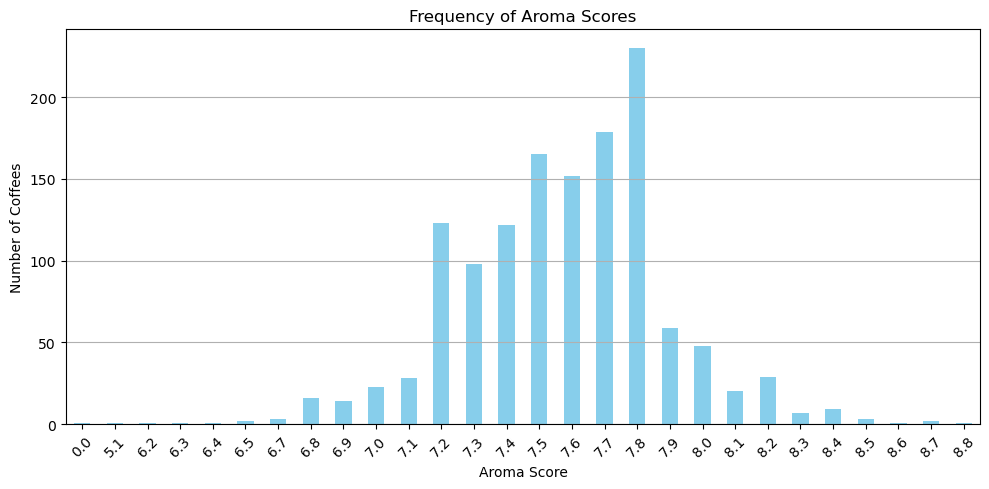

In [75]:
score_counts = coffee_dataset['aroma'].dropna().round(1).value_counts().sort_index()

plt.figure(figsize=(10, 5))
score_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of Aroma Scores")
plt.xlabel("Aroma Score")
plt.ylabel("Number of Coffees")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

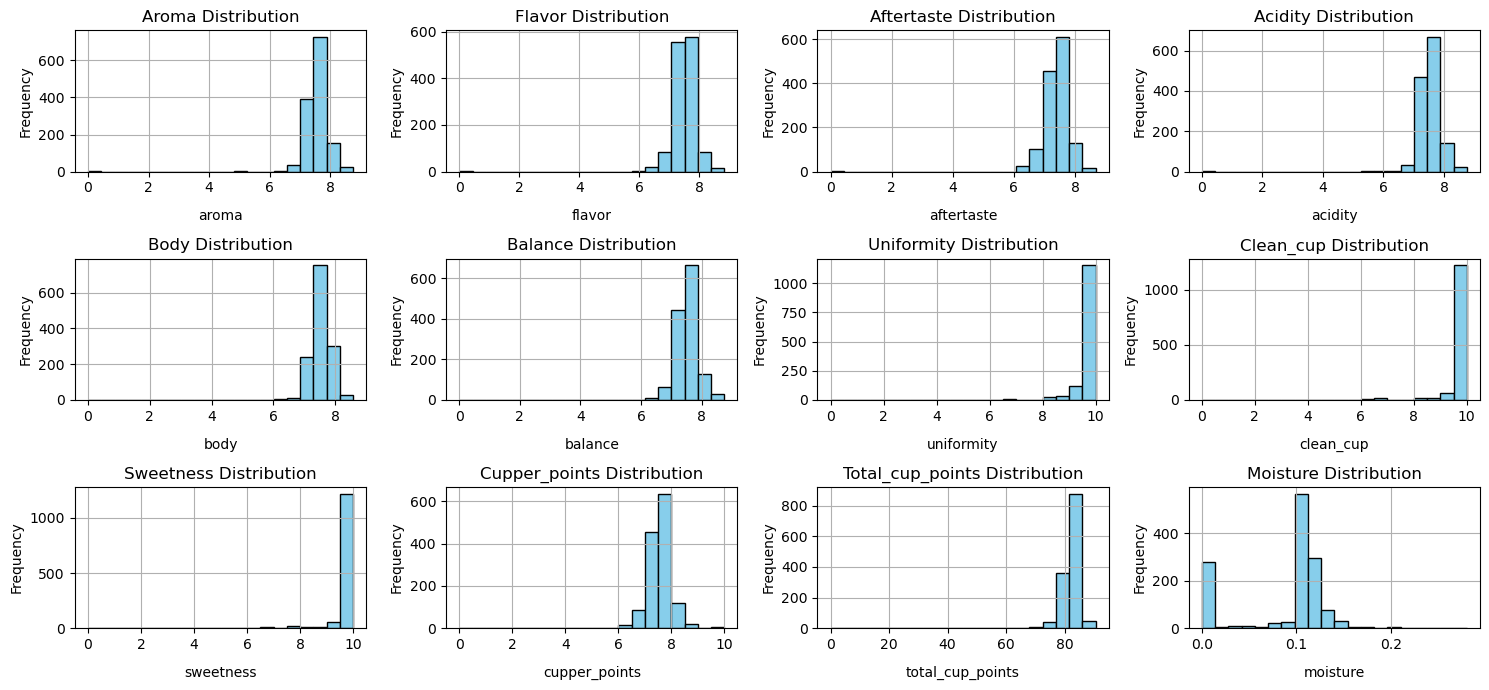

In [77]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(rating_columns):
    axes[i].hist(coffee_dataset[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{col.capitalize()} Distribution")
    axes[i].set_xlabel(col, labelpad=10)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()  


In [79]:
correlation_matrix = coffee_dataset[statistical_columns].corr()
print(correlation_matrix)

                     aroma    flavor  aftertaste   acidity      body  \
aroma             1.000000  0.813259    0.777056  0.723582  0.673006   
flavor            0.813259  1.000000    0.895672  0.816688  0.735720   
aftertaste        0.777056  0.895672    1.000000  0.792255  0.734306   
acidity           0.723582  0.816688    0.792255  1.000000  0.706435   
body              0.673006  0.735720    0.734306  0.706435  1.000000   
balance           0.708634  0.792290    0.809639  0.733017  0.757597   
uniformity        0.366578  0.410923    0.401456  0.375383  0.326879   
clean_cup         0.335684  0.396958    0.386665  0.300927  0.276587   
sweetness         0.253493  0.291065    0.266409  0.261854  0.268342   
cupper_points     0.687288  0.793197    0.785123  0.698151  0.633208   
total_cup_points  0.791627  0.874279    0.860656  0.797024  0.757165   
moisture         -0.134127 -0.145201   -0.180510 -0.129079 -0.147651   

                   balance  uniformity  clean_cup  sweetness  c

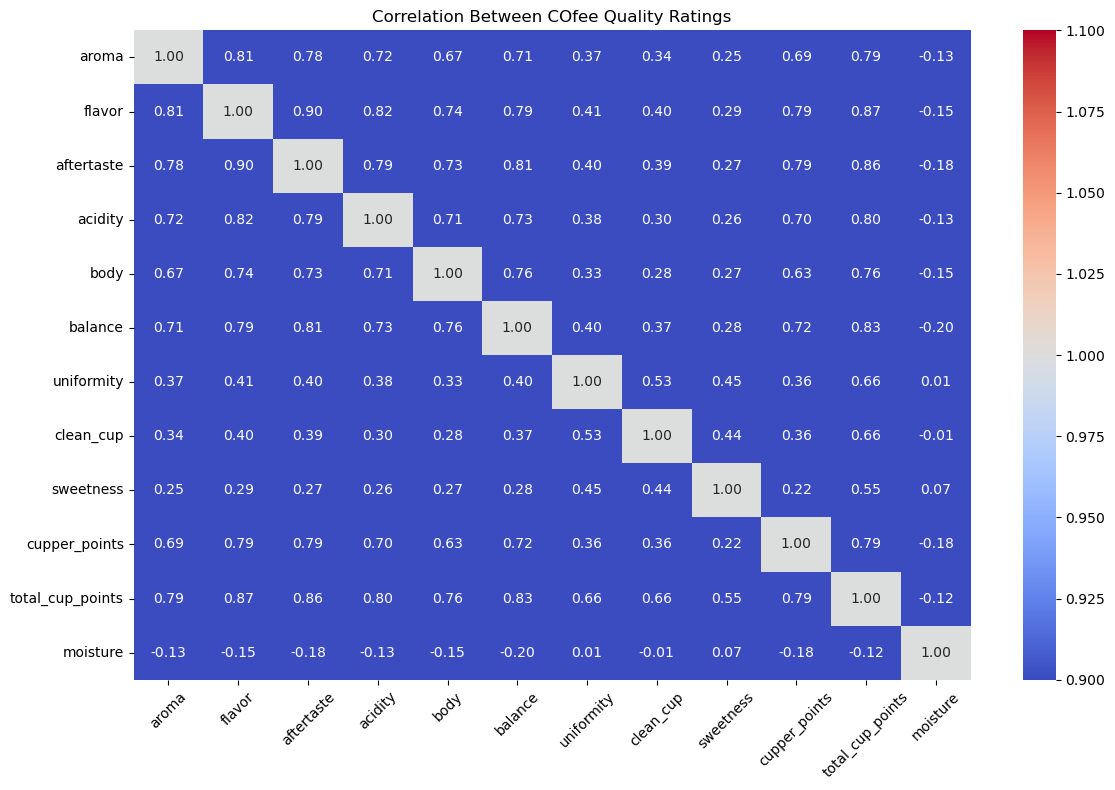

In [80]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=1, vmax=1, fmt=".2f")
plt.title("Correlation Between COfee Quality Ratings")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\georgi.petrov\AppData\Local\Temp\ipykernel_432\150454723.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature', y='Score', data=melted, palette='Set2')


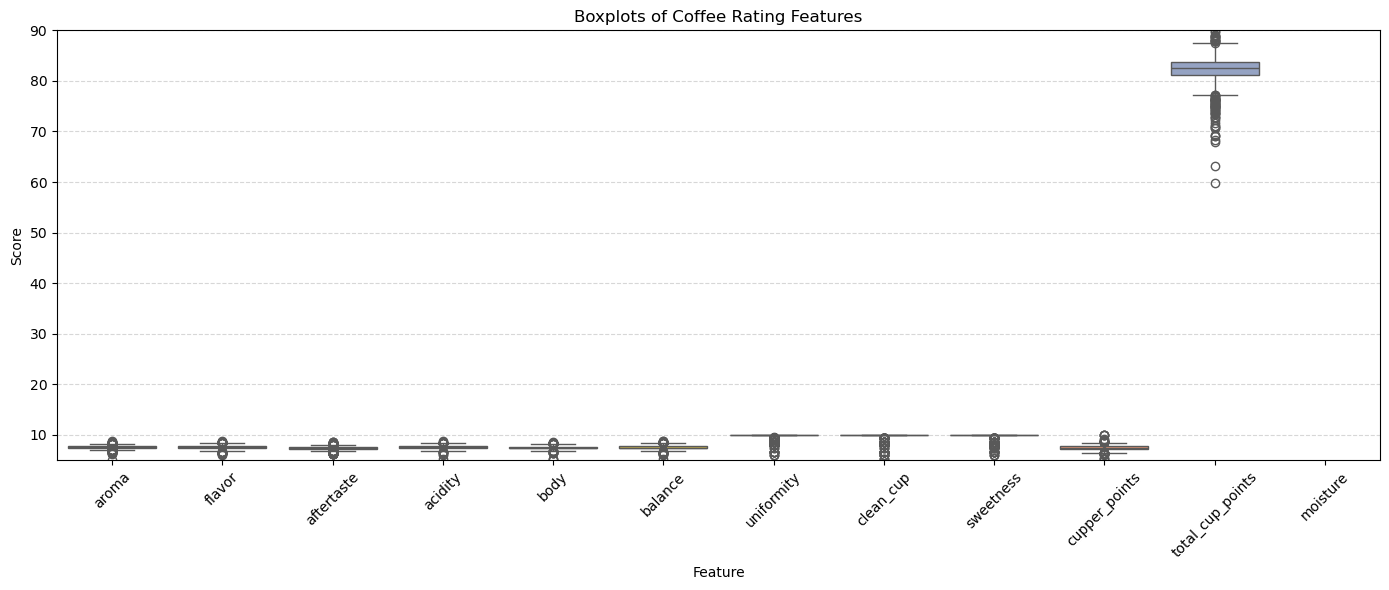

In [81]:
ratings_clean = coffee_dataset[statistical_columns].dropna()
melted = ratings_clean.melt(var_name='Feature', value_name='Score')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Feature', y='Score', data=melted, palette='Set2')
plt.title('Boxplots of Coffee Rating Features')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.ylim(5, 90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\georgi.petrov\AppData\Local\Temp\ipykernel_432\3509846437.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature', y='Score', data=melted_scaled, palette='Set3')


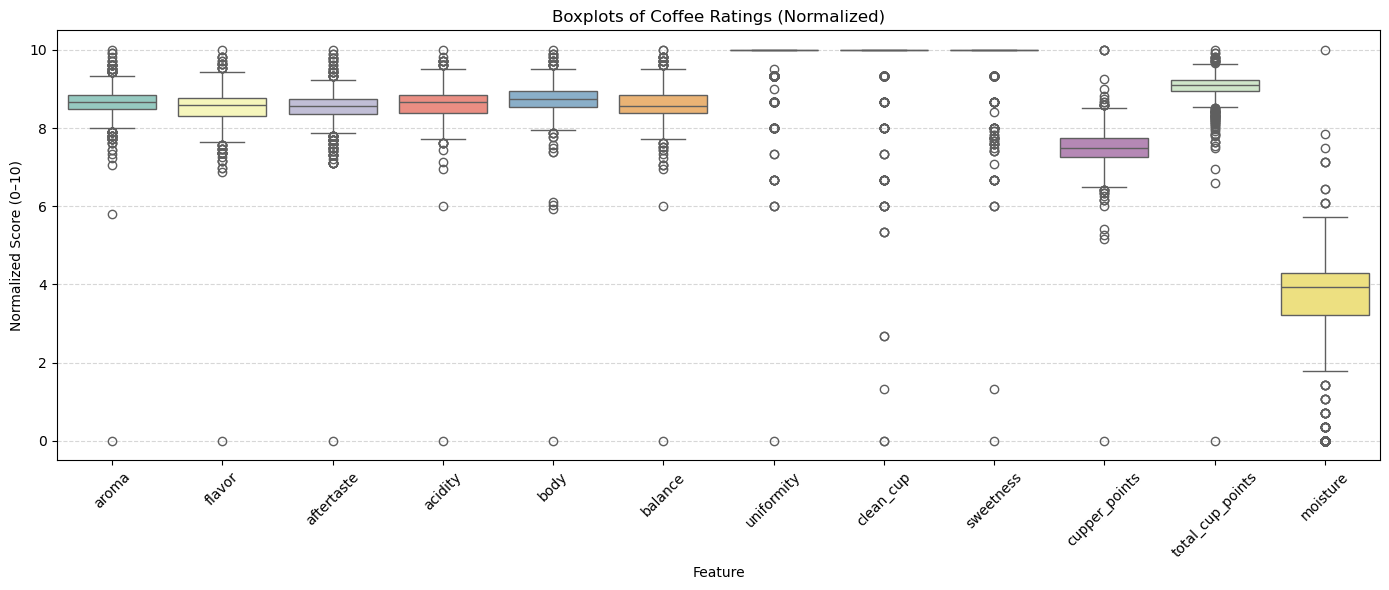

In [83]:
scaled_data = coffee_dataset[statistical_columns].copy()

scaler = MinMaxScaler(feature_range=(0, 10))
scaled_data[rating_columns] = scaler.fit_transform(scaled_data[rating_columns])

melted_scaled = scaled_data.melt(var_name='Feature', value_name='Score')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Feature', y='Score', data=melted_scaled, palette='Set3')
plt.title('Boxplots of Coffee Ratings (Normalized)')
plt.xticks(rotation=45)
plt.ylabel('Normalized Score (0–10)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## От няколкото ртазлични графики моцем да направим някои важни за нашия анализ изводи.
## От корелационната карта виждаме, че има доста висока зависимост (0.9) между вида кафе и послевкуса-а
## flavor <-> aftertaste.
## Виждаме и висока корелация между вкус и крайна оценка flavour <-> total_cup_points (0.85)

## От boxplots графиката виждаме, че няколко показателя имат по-широки кутийки и ясно видими отклонения, 
## (Аромат, Вкус, Послевкус, Киселинност, Плътност и Баланс:). Техните медиани са около 8.5 - 9.0 което подсказва за 
## високи оценки по тези характеристики.

## От boxplots графиката също така се виждат и някои характеристики с много ниска променливост. 
  ##  Техните стойности са почти еднакви или са изключително близки една до друга (clean_cup, sweetnes )

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

## Проверяваме страна срещу регион

In [84]:
country_region = coffee_dataset.groupby('country_of_origin')['region'].unique()
for country, regions in country_region.items():
    print(f"{country}: {regions}")

Brazil: [nan 'south of minas' 'vale da grama' 'sul de minas - carmo de minas'
 'grama valley' 'mountains of minas gerais' 'mmm' 'test' 'cerrado'
 'minas gerais, br' 'carmo de minas' 'campos altos - cerrado' 'mogiana'
 'chapadÃ£o de ferro (cerrado mineiro)' 'high mogiana' 'sul de minas'
 'monte carmelo' 'brazil matas de minas' 'mantiqueira de minas'
 'matas de minas        ' 'alta paulista (sao paulo)'
 'cerrado - monte carmelo - minas gerais']
Burundi: ['kayanza' 'mumirwa']
China: ['yunnan' 'dehong prefecture' 'menglian' 'xishuangbanna prefecture']
Colombia: ['tolima' 'huila' 'santander' 'pasto' 'cundinamarca' 'cauca' 'pitalito'
 'la plata' 'nariÃ±o' 'huila supremo' 'guayata' 'eje cafetero' nan
 'antioquia' 'south huila'
 '52 narino (exact location: mattituy; municipal region: florida code 381'
 'pereira']
Costa Rica: ['san ramon' 'west and central valley' 'west valley' 'tarrazu'
 'costa rica' nan 'tres rios' 'valle central' 'central valley' 'turrialba'
 'occidental' 'naranjo' 'brunca'

##  Доста грешки в изписването и асайнването на регионите към дадена държава.
##  например имаме 'United States' с регион 'antioquia'. Antioquia е в Colombia
##  Имаме - Colombia с регион '52 narino (exact location: mattituy; municipal region: florida code 381'
##  което изглежда като грешно, недописано  и т.н.
##  Имаме и 'dummy' стойности -> Brazil с регион ['ммм', 'тест']
##  и още много . ..

In [86]:
country_region_map = {
    'Brazil': ['test', 'nan', 'cerrado', 'sul de minas - carmo de minas', 'grama valley'],
    'United States': ['antioquia', 'berastagi', 'central america', 'chikmagalur'],

}

coffee_dataset['region'] = coffee_dataset['region'].apply(normalize_text)
bad_regions = ['nan', 'test', 'mmm', 'na', 'none']

coffee_dataset = coffee_dataset[~coffee_dataset['region'].isin(bad_regions)]

## Ще търсим невалидни altitudes
## ще използваме филтър като:
## mean < low
## mean > high

In [93]:
altitude_check = coffee_dataset[
    (coffee_dataset['altitude_mean_meters'] < coffee_dataset['altitude_low_meters']) |
    (coffee_dataset['altitude_mean_meters'] > coffee_dataset['altitude_high_meters'])
]

print(altitude_check[['country_of_origin', 'region', 'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']])
print(coffee_dataset[['altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']].isnull().sum())

Empty DataFrame
Columns: [country_of_origin, region, altitude_low_meters, altitude_high_meters, altitude_mean_meters]
Index: []
altitude_low_meters     228
altitude_high_meters    228
altitude_mean_meters    228
dtype: int64


### празният дейтасет който имаме катъо аутпут ни подсказва, че 'mean altitudes' са в рамките на мин-макс стойностите 
### имаме 288 реда в който тези стойности липсват

### да проверим дали не сме допуснали грешка

In [95]:
null_rows = coffee_dataset[
    coffee_dataset['altitude_low_meters'].isnull() &
    coffee_dataset['altitude_high_meters'].isnull() &
    coffee_dataset['altitude_mean_meters'].isnull()
]

print(len(null_rows))

228


### отново получаваме 228.
### Това означава, че данните за надморската височина липсват изцяло за тези 228 реда.
### нямаме частична липса, например имаме 'low', но нямаме 'high'. липсват напълно данни

### ще потърсим някакви аномалии с екстремно ниски надмосрки височини:

In [97]:
coffee_dataset[
    (coffee_dataset["altitude_all_equal"]) & 
    (coffee_dataset["altitude_mean_meters"] < 100)
]

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,bag_weight [kg],harvest_year_original,harvest_year_en,harvest_time_start,harvest_time_end,harvest_normalized,harvest_year_norm,harvest_year_clean,continent,altitude_all_equal
unnamed: 0,,,,,,,,,,,,,,,,,,,,,
41,Arabica,jacques pereira carneiro,Brazil,pereira estate coffee,NaN,cocarive,002/1352/0045,NaN,1.2,sul de minas - carmo de minas,...,60,2010,2010,NaN,NaN,2010,2010,2010,South America,True
42,Arabica,jacques pereira carneiro,Brazil,pereira estate coffee,NaN,cocarive,002/1352/0045,NaN,1.2,sul de minas - carmo de minas,...,60,2010,2010,NaN,NaN,2010,2010,2010,South America,True
100,Arabica,simon mahinda,Kenya,NaN,CN 11462 AA,ckcm,NaN,c dorman ltd,-1,None,...,60,2015,2015,NaN,NaN,2015,2015,2015,Africa,True
279,Arabica,ipanema coffees,Brazil,rio verde,NaN,ipanema comercial e exportadora sa,002/4177/0150,ipanema coffees,1,south of minas,...,2,2015/2016,2015/2016,NaN,NaN,2015 / 2016,2015/2016,2015/2016,South America,True
481,Arabica,ipanema coffees,Brazil,rio verde,NaN,ipanema comercial e exportadora sa,002/4177/0164,ipanema coffees,1,south of minas,...,2,2015/2016,2015/2016,NaN,NaN,2015 / 2016,2015/2016,2015/2016,South America,True
613,Arabica,ipanema coffees,Brazil,rio verde,NaN,ipanema comercial e exportadora sa,002/4177/0150,ipanema coffees,1,south of minas,...,2,2015/2016,2015/2016,NaN,NaN,2015 / 2016,2015/2016,2015/2016,South America,True
683,Arabica,ipanema coffees,Brazil,rio verde,NaN,ipanema comercial e exportadora sa,002/4177/0150,ipanema coffees,1,south of minas,...,2,2015/2016,2015/2016,NaN,NaN,2015 / 2016,2015/2016,2015/2016,South America,True
737,Arabica,ipanema coffees,Brazil,rio verde,NaN,ipanema comercial e exportadora sa,002/4177/0150,ipanema coffees,1,south of minas,...,2,2015/2016,2015/2016,NaN,NaN,2015 / 2016,2015/2016,2015/2016,South America,True
761,Arabica,ipanema coffees,Brazil,rio verde,NaN,ipanema comercial e exportadora sa,002/4177/0164,ipanema coffees,1,south of minas,...,2,2015/2016,2015/2016,NaN,NaN,2015 / 2016,2015/2016,2015/2016,South America,True


### Имаме странно ниски надмоески височини.. 
### хипотеза -> стойностите за много ниските надморски вичочини са в километри, като мерни единици.
### например, бърз сърч в гугъл за първия запис:
### The Pereira Estate, also known as Irmãs Pereira, in Brazil, grows coffee at altitudes between 1075 and 1229 meters above sea level (masl).
### това напълно отговаря на стойността която имаме - 1.2

### втори пример: Aquiares region is known for its coffee production, with farms typically situated between 1200 and 1500 meters.
### което също отговаря на стойността която имаме от 1.3 

### можем наистина да предположим, че тези стойности са дадени в километри за някой ферми

### Има и примери като Еквадор - със 'altitude' сойност - 40... wtf is this...

### Mexico El Pacayal, Amantenango de la Frontera, Chiapas, Mexico is not explicitly stated in the provided search results. However, the general region, the Northern Mountains of Chiapas, has elevations reaching above 12,000 feet (3,650 meters)
### => това което имаме като стойност 12оо  е може би feet? 

In [92]:
same_altitude = coffee_dataset[
    (coffee_dataset['altitude_low_meters'] == coffee_dataset['altitude_high_meters']) &
    (coffee_dataset['altitude_low_meters'] == coffee_dataset['altitude_mean_meters'])
]
print(same_altitude[['country_of_origin', 'region', 'altitude_low_meters']].value_counts().head(10))

country_of_origin  region          altitude_low_meters
Guatemala          oriente         1310.64                31
Colombia           huila           1750.00                25
Guatemala          oriente         1219.20                22
                   antigua         1500.00                13
Colombia           huila           442.00                 12
Brazil             south of minas  1.00                   11
                                   890.00                 11
Guatemala          san marcos      1700.00                10
Thailand           thailand        800.00                 10
Colombia           huila           1800.00                 9
Name: count, dtype: int64


## имаме няколко държави с еднакви 'altitude' стойности
## това може да означава, че имаме неточни данни 

## Create the 'altitude_all_equal' column

In [99]:
coffee_dataset['altitude_all_equal'] = (
    (coffee_dataset['altitude_low_meters'] == coffee_dataset['altitude_high_meters']) &
    (coffee_dataset['altitude_low_meters'] == coffee_dataset['altitude_mean_meters'])
)
print(implausible_altitudes[['country_of_origin', 'region', 'altitude_mean_meters']])


           country_of_origin                         region  \
unnamed: 0                                                    
41                    Brazil  sul de minas - carmo de minas   
42                    Brazil  sul de minas - carmo de minas   
100                    Kenya                           None   
279                   Brazil                 south of minas   
481                   Brazil                 south of minas   
613                   Brazil                 south of minas   
683                   Brazil                 south of minas   
737                   Brazil                 south of minas   
761                   Brazil                 south of minas   
780                   Brazil                 south of minas   
785               Costa Rica                      turrialba   
838                   Brazil                 south of minas   
839                   Brazil                 south of minas   
877                   Brazil                 south of m

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!

In [100]:
print(coffee_dataset.columns)

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'variety', 'processing_method', 'aroma', 'flavor',
       'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup',
       'sweetness', 'cupper_points', 'total_cup_points', 'moisture',
       'category_one_defects', 'quakers', 'color', 'category_two_defects',
       'expiration', 'certification_body', 'certification_address',
       'certification_contact', 'unit_of_measurement', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters', 'is_missing',
       'bag_weight [kg]', 'harvest_year_original', 'harvest_year_en',
       'harvest_time_start', 'harvest_time_end', 'harvest_normalized',
       'harvest_year_norm', 'harvest_year_clean', 'continent',
       'altitude_all_equal'],
      dtype='object')
